# PART ONE OF LOGISTIC REGRESSION-BINARY CLASSIFICATION

# Predicting if a person would buy life insurnace based on his age using logistic regression

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import *

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/insurance_data.csv")
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [4]:
i=df[df['age']==60]
print(i)

   age  bought_insurance
7   60                 1


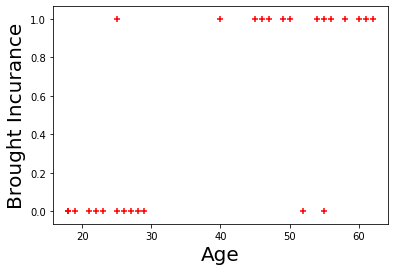

In [5]:
plt.xlabel("Age",fontsize=20)
plt.ylabel("Brought Incurance",fontsize=20)
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [6]:
df.shape

(27, 2)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['age']],df[['bought_insurance']],test_size=0.1,random_state=10)

In [8]:
X_test

,age
7,60
5,56
18,19


In [9]:
X_train

,age
21,26
11,28
1,25
2,47
12,27
24,50
14,49
13,29
20,21
3,52


In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model=LogisticRegression()

In [12]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
model.predict(X_test)

array([1, 1, 0], dtype=int64)

In [14]:
X_test

,age
7,60
5,56
18,19


In [15]:
y_test

,bought_insurance
7,1
5,1
18,0


In [16]:
i=df[df['age']==60]
print(i)

   age  bought_insurance
7   60                 1


In [17]:
model.score(X_test,y_test)

1.0

In [18]:
model.predict_proba(X_test)

array([[0.20618565, 0.79381435],
       [0.24045662, 0.75954338],
       [0.6638168 , 0.3361832 ]])

In [19]:
model.predict([[60]])

array([1], dtype=int64)

# PART ONE EXERCISE

1> Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)

2> Plot bar charts showing impact of employee salaries on retention

3> Plot bar charts showing corelation between department and employee retention

4> Now build logistic regression model using variables that were narrowed down in step 1
5> Measure the accuracy of the model

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
hr_df=pd.read_csv("HR_data.csv")
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [22]:
hr_df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [23]:
hr_df.shape

(14999, 10)

# Data exploation and visulization

In [24]:
hr_df.left.shape

(14999,)

In [25]:
left=hr_df[hr_df.left==0]
left.shape

(11428, 10)

In [26]:
left=hr_df[hr_df.left==1]
left.shape

(3571, 10)

In [27]:
hr_df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,

1 **Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)

2 **Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)

3 **Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm


# Impact of Employee Salaries on Retention

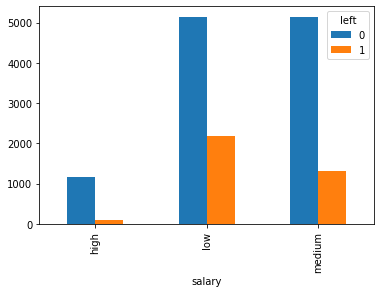

In [28]:
pd.crosstab(hr_df.salary,hr_df.left).plot(kind='bar')

Above bar chart shows employees with high salaries are likely to not leave the company

# Department wise employee retention rate

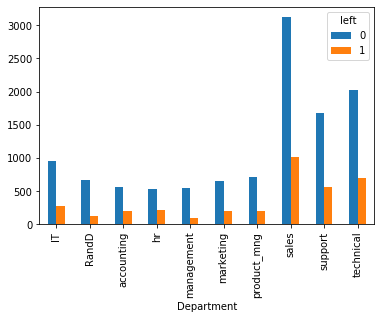

In [29]:
pd.crosstab(hr_df.Department,hr_df.left).plot(kind='bar')

from above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

# From the data analysis so far we can conclude that we will use following variables as independant variables in our model


1 **Satisfaction Level**

2 **Average Monthly Hours**

3 **Promotion Last 5 Years**

4 **Salary**

In [30]:
subdf=hr_df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


# Tackle salary dummy variable

Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that

In [31]:
salary_dummies=pd.get_dummies(subdf.salary,prefix='salary')
salary_dummies.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [32]:
df_with_dummies=pd.concat([subdf,salary_dummies],axis=1)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


Now we need to remove salary column which is text data. It is already replaced by dummy variables so we can safely remove it

In [33]:
df_with_dummies.drop("salary",axis=1,inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [34]:
X=df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [35]:
y=hr_df.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [37]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()

In [38]:
model1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
model1.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
X_test.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
13982,0.65,125,0,0,1,0
822,0.41,128,0,0,1,0
13751,0.44,125,0,0,0,1
9656,0.93,190,0,0,0,1
13497,0.76,170,0,0,0,1


In [41]:
model1.predict([[0.6,125,0,0,1,0]])

array([0], dtype=int64)

In [42]:
i=hr_df[hr_df['promotion_last_5years']==1]
print(i)

       satisfaction_level  last_evaluation  number_project  \
18                   0.45             0.51               2   
82                   0.79             0.59               4   
171                  0.41             0.46               2   
287                  0.11             0.79               6   
584                  0.41             0.56               2   
751                  0.46             0.45               2   
1000                 0.87             1.00               4   
1667                 0.44             0.55               2   
4499                 0.94             0.80               5   
4500                 0.58             0.71               4   
4501                 0.43             0.60               3   
4502                 0.72             0.49               3   
4503                 0.95             0.96               5   
4504                 0.35             0.67               3   
4505                 0.77             0.79               3   
4506    

# Accuracy of the Model

In [43]:
model1.score(X_test,y_test)

0.7766666666666666

# PART TWO OF LOGISTIC REGRESSION-MULTICLASS

In [44]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()

In [62]:
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

<Figure size 432x288 with 0 Axes>

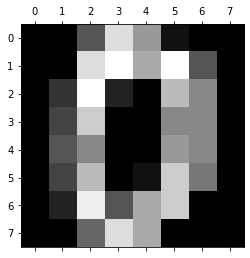

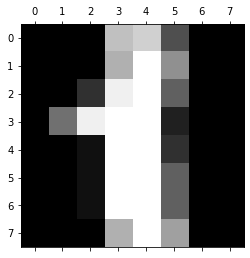

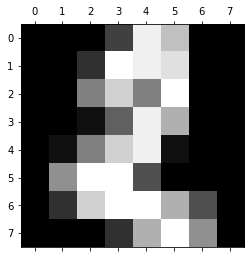

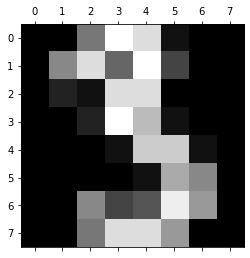

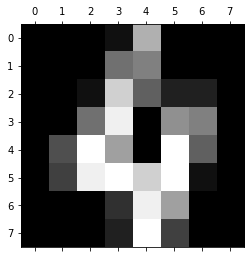

In [45]:
plt.gray() 
for i in range(5):
    plt.matshow(digits.images[i])

In [46]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [47]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [48]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

# Create and train logistic regression model

In [49]:
import warnings
warnings.filterwarnings("ignore")

In [50]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()

In [51]:

from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)

In [53]:
model2.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Measure accuracy of the model

In [54]:
model2.score(X_test,y_test)

0.9472222222222222

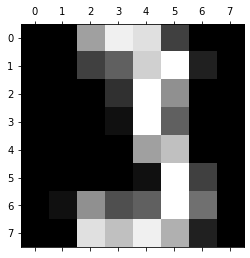

In [55]:
plt.matshow(digits.images[60])

In [56]:
digits.target[67]

6

In [57]:
X_test

array([[ 0.,  0., 10., ...,  1.,  0.,  0.],
       [ 0.,  0.,  3., ...,  8.,  0.,  0.],
       [ 0.,  0.,  1., ...,  4.,  0.,  0.],
       ...,
       [ 0.,  0.,  2., ...,  0.,  0.,  0.],
       [ 0.,  0.,  2., ...,  6.,  0.,  0.],
       [ 0.,  0.,  0., ...,  2.,  0.,  0.]])

In [58]:
model.predict([[67]])

array([1], dtype=int64)

In [59]:
model.predict([digits.data[6]])

ValueError: X has 64 features per sample; expecting 1

In [ ]:
model.predict(digits.data[5])

# Confusion matrix

In [ ]:
y_predicted=model2.predict(X_test)
from sklearn.metrics import confusion_matrix

In [ ]:
cm=confusion_matrix(y_test,y_predicted)
cm

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# PART TWO EXERCISE

Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out accuracy of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,

1 Sepal Length

2 Sepal Width

3 Petal Length

4 Petal Width

Using above 4 features you will clasify a flower in one of the three categories,

1 Setosa


2 Versicolour

3 Virginica

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data=pd.read_csv("iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
encode= LabelEncoder()
data.Species=encode.fit_transform(data.Species)

In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [ ]:
plt.scatter(data.SepalLengthCm,data.SepalWidthCm,color='red',s=20)
plt.scatter(data.PetalLengthCm,data.PetalWidthCm,color='blue',s=20)

In [ ]:
plt.scatter(data.PetalLengthCm,data.Species)
plt.scatter(data.PetalWidthCm,data.Species)

In [ ]:
plt.scatter(data.PetalWidthCm,data.Species)

In [ ]:
plt.scatter(data.SepalLengthCm,data.Species)

In [ ]:
plt.scatter(data.SepalWidthCm,data.Species)

In [ ]:
X = train.drop(columns=['Species'],axis=1)
y= train['Species']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(train_x,train_y)

In [ ]:
X_test.head()

In [ ]:
#calling a single row

In [ ]:
data.iloc[130]

In [ ]:
predict = model.predict(X_test)
predict

In [ ]:
model.predict([[131,7.4,2.8,6.1,1.9]])

In [ ]:
model.score(X_test,y_test)